REGRESSIONE LOGISTICA

Teoria:

 - https://it.wikipedia.org/wiki/Modello_logit
 - https://www.ibm.com/it-it/topics/logistic-regression
 - https://adrianogilardone.com/regressione-logistica/
 

In statistica, il modello logit, noto anche come modello logistico o regressione logistica, è un modello di regressione nonlineare utilizzato quando la variabile dipendente è di tipo dicotomico. L'obiettivo del modello è di stabilire la probabilità con cui un'osservazione può generare uno o l'altro valore della variabile dipendente; può inoltre essere utilizzato per classificare le osservazioni, in base alla caratteristiche di queste, in due categorie



Sia la regressione lineare che quella logistica sono tra i modelli più diffusi nella data science, e strumenti open-source come Pyton ed R rendono il loro calcolo rapido e facile.

I modelli di regressione lineare sono utilizzati per identificare la relazione tra una variabile dipendente continua e una o più variabili indipendenti. La presenza di una sola variabile indipendente e una sola variabile dipendente è nota come regressione lineare semplice ma, quando il numero di variabili indipendenti aumenta, viene indicata come regressione lineare multipla. Per ogni tipo di regressione lineare, cerca di tracciare una linea di best fit mediante un insieme di punti dati, di norma calcolato utilizzando il metodo dei minimi quadrati.

Simile alla regressione lineare, la regressione logistica viene utilizzata anche per stimare la relazione tra una variabile dipendente e una o più variabili indipendenti, ma viene utilizzata per fare una previsione circa una variabile categoriale rispetto a una continua. Una variabile categoriale può essere true o false, sì o no, 1 o 0 eccetera. Anche l'unità di misura è diversa rispetto alla regressione lineare poiché produce una probabilità ma la funzione logit trasforma la curva S in una linea dritta.  

Sebbene entrambi i modelli siano utilizzati nell'analisi di regressione per fare previsioni sui risultati futuri, la regressione lineare è di solito più facile da comprendere. Inoltre, la regressione lineare non richiede una dimensione di campione tanto grande quanto la regressione logistica che ha bisogno di un campione adeguato per rappresentare i valori in tutte le categorie di risposta. Senza un campione rappresentativo più grande, il modello potrebbe non avere una potenza statistica sufficiente per rilevare un effetto significativo.


CODICE:

 - https://www.andreaminini.com/python/sklearn/regressione-logistica-con-python

In [1]:
# importiamo le librerie necessarie
import numpy as np

# importiamo la libreria dei dataset di sklearn e la funzione per calcolare l'accuratezza del modello, 
# e la funzione per dividere il dataset in training e test set
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [2]:
# preparazione dataset iris e divisione in training e test set
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]  # prendiamo solo le ultime due features (petal length e petal width)
y = iris.target           # prendiamo le etichette

# dividiamo il dataset in training e test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [3]:
# standardizzazione delle features (per avere una migliore convergenza dell'algoritmo)
# importiamo la classe StandardScaler dalla libreria preprocessing di sklearn
from sklearn.preprocessing import StandardScaler

# creiamo un oggetto StandardScaler e lo addestriamo sui dati di training
sc = StandardScaler()

# effettuiamo lo scaler sui dati di training
sc.fit(X_train)

# standardizziamo i dati di training e test
X_std = sc.transform(X)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [4]:
# addestramento del modello di regressione logistica con sklearn
# importiamo la classe LogisticRegression dalla libreria linear_model di sklearn
from sklearn.linear_model import LogisticRegression

# creiamo un oggetto LogisticRegression e lo addestriamo sui dati di training
lr = LogisticRegression(C=1000.0, random_state=0)  # C è il parametro di regolarizzazione (più è alto, meno è la regolarizzazione)
lr.fit(X_train_std, y_train)

LogisticRegression(C=1000.0, random_state=0)

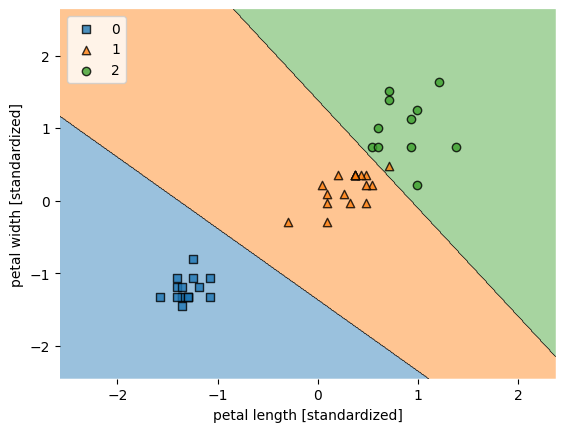

In [5]:
# visualizzazione grafica della classificazione
# importiamo la funzione plot_decision_regions dalla libreria mlxtend.plotting
# https://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_test_std, y_test, clf=lr, legend=2)

# aggiungiamo le etichette del grafico e mostriamo il grafico
import matplotlib.pyplot as plt
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

In [6]:
# calcoliamo l'accuratezza del modello
# importiamo la funzione accuracy_score dalla libreria metrics di sklearn
from sklearn.metrics import accuracy_score

# calcoliamo le predizioni sul test set
y_pred = lr.predict(X_test_std)

# calcoliamo l'accuratezza
print('Accuratezza: %.2f' % accuracy_score(y_test, y_pred))

# visualizziamo le predizioni
print('Predizioni: %s' % y_pred)

# visualizziamo le etichette reali
print('Etichette reali: %s' % y_test)

# visualizziamo le probabilità di appartenenza alle classi
print('Probabilità: %s' % lr.predict_proba(X_test_std))

# visualizziamo i pesi
print('Pesos: %s' % lr.coef_)
print('Intercept: %s' % lr.intercept_)


Accuratezza: 0.98
Predizioni: [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2 1 1 2 0 2 0 0]
Etichette reali: [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1 1 1 2 0 2 0 0]
Probabilità: [[6.51335792e-16 4.95077314e-04 9.99504923e-01]
 [1.32640538e-04 9.99818817e-01 4.85423440e-05]
 [9.99948083e-01 5.19168039e-05 2.89755641e-18]
 [3.79330985e-16 1.18063223e-04 9.99881937e-01]
 [9.99921056e-01 7.89436666e-05 7.52757094e-18]
 [1.95972890e-20 1.73749925e-06 9.99998263e-01]
 [9.99908391e-01 9.16094804e-05 6.87845585e-18]
 [4.47997927e-08 8.83125850e-01 1.16874105e-01]
 [8.14992933e-08 9.10438731e-01 8.95611875e-02]
 [6.86252027e-06 9.99403940e-01 5.89197752e-04]
 [3.84627242e-10 1.22830323e-01 8.77169677e-01]
 [1.12211798e-07 9.56627690e-01 4.33721973e-02]
 [9.69522133e-07 9.89217832e-01 1.07811987e-02]
 [7.15933975e-08 9.28107927e-01 7.18920010e-02]
 [1.28709854e-07 9.45556739e-01 5.44431319e-02]
 [9.99980651e-01 1.93486780e-05 4.